<a href="https://colab.research.google.com/github/Sravani-05/Classifications/blob/main/02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pycaret.datasets import get_data
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Data mining/drug200.csv")


In [ ]:
dataset.shape

(200, 6)

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (180, 6)
Unseen Data For Predictions: (20, 6)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Drug', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(180, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9833,0.6955,0.9717,0.9804,0.9800,0.9743,0.9763,0.014
rf,Random Forest Classifier,0.9833,0.7000,0.9717,0.9804,0.9800,0.9743,0.9763,0.461
lr,Logistic Regression,0.9756,0.7000,0.9533,0.9699,0.9701,0.9641,0.9667,0.577
gbc,Gradient Boosting Classifier,0.9756,0.6970,0.9617,0.9746,0.9716,0.9632,0.9660,0.335
lightgbm,Light Gradient Boosting Machine,0.9603,0.7000,0.9643,0.9730,0.9606,0.9417,0.9460,0.212
et,Extra Trees Classifier,0.9372,0.6959,0.9413,0.9522,0.9336,0.9101,0.9186,0.464
ridge,Ridge Classifier,0.8897,0.0000,0.8250,0.8736,0.8711,0.8398,0.8513,0.013
lda,Linear Discriminant Analysis,0.8750,0.6954,0.9152,0.9181,0.8715,0.8321,0.8488,0.015
ada,Ada Boost Classifier,0.8551,0.6757,0.6367,0.7599,0.7994,0.7810,0.7948,0.091
nb,Naive Bayes,0.7449,0.6395,0.8672,0.8602,0.7292,0.6660,0.7102,0.019


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.9167,0.9286,0.9115,0.8681,0.8786
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,0.9545,0.8000,0.8750,0.8889,0.8750,0.8843


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.8396,0.5333,0.5897,0.6000,0.4444,0.4483
1,0.6923,0.9348,0.4333,0.6538,0.6703,0.5517,0.5567
2,0.7692,0.9131,0.7667,0.8462,0.7418,0.6549,0.6881
3,0.6923,0.0000,0.5500,0.7033,0.6824,0.5439,0.5586
4,0.5385,0.0000,0.3833,0.6923,0.5744,0.3953,0.4328
5,0.5833,0.0000,0.3000,0.5417,0.5397,0.3182,0.3357
6,0.5833,0.7776,0.3667,0.5556,0.5621,0.4118,0.4203
7,0.6667,0.9238,0.6000,0.5694,0.5972,0.5200,0.5474
8,0.8333,0.9154,0.7333,0.7917,0.8056,0.7500,0.7579


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9231,1.0000,0.9333,0.9487,0.9231,0.8908,0.8983
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,1.0000,0.8000,0.8750,0.8889,0.8750,0.8843


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,0.0000,0.9167,0.9286,0.9115,0.8681,0.8786
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,0.9545,0.8000,0.8750,0.8889,0.8750,0.8843


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.8129,0.6333,0.7154,0.6767,0.5738,0.6035
1,0.6923,0.8761,0.6000,0.5615,0.6007,0.5702,0.6229
2,0.6923,0.8660,0.5667,0.7692,0.6648,0.5398,0.5673
3,0.7692,0.0000,0.6500,0.8828,0.7491,0.6638,0.7001
4,0.5385,0.0000,0.3167,0.6154,0.5690,0.3554,0.3679
5,0.6667,0.0000,0.4000,0.5952,0.6282,0.5102,0.5695
6,0.6667,0.8504,0.4667,0.6806,0.6149,0.5294,0.5582
7,0.7500,0.9331,0.8000,0.6528,0.6806,0.6471,0.6948
8,0.7500,0.9099,0.6667,0.8611,0.7500,0.6400,0.6667


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9231,1.0000,0.9333,0.9487,0.9231,0.8908,0.8983
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.0000,0.9583,0.9615,0.9324,0.8889,0.8971
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9167,1.0000,0.8000,0.8750,0.8889,0.8750,0.8843


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


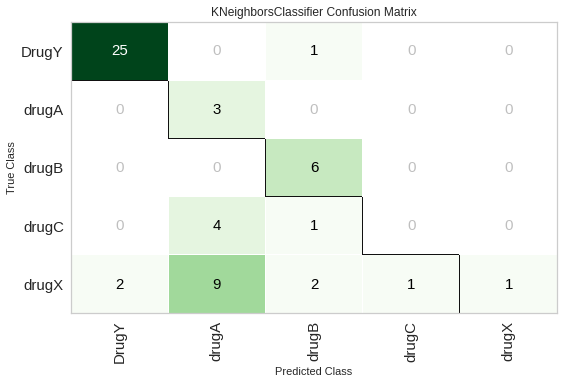

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

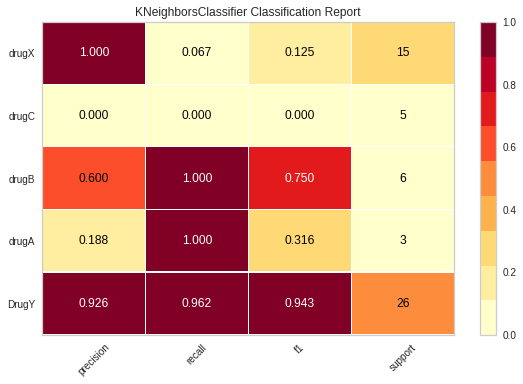

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

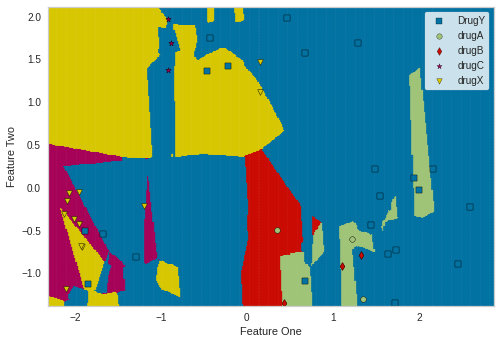

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

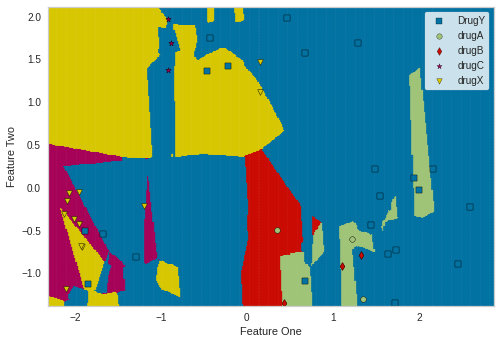

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

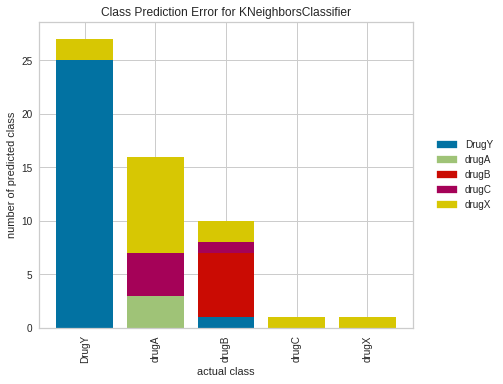

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6364,0.8644,0.6056,0.7861,0.5791,0.4989,0.5488


In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [ ]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.7716,0,0,0,0,0


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,22,F,NORMAL,HIGH,8.607,drugX,drugA,0.5
1,57,M,LOW,NORMAL,19.128,DrugY,DrugY,1.0
2,48,F,LOW,HIGH,15.036,DrugY,DrugY,0.5
3,18,F,NORMAL,NORMAL,8.750,drugX,drugX,1.0
4,62,M,LOW,NORMAL,27.183,DrugY,DrugY,1.0


In [ ]:
save_model(final_knn,'Final KNN Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), model_name=Final KNN Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Drug',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('fix_perfect', Remove_100(target='Drug')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
           

In [ ]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('fix_perfect', Remove_100(target='Drug')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('d

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.0,0.7716,0,0,0,0,0


In [ ]:
new_prediction.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Label,Score
0,22,F,NORMAL,HIGH,8.607,drugX,drugA,0.5
1,57,M,LOW,NORMAL,19.128,DrugY,DrugY,1.0
2,48,F,LOW,HIGH,15.036,DrugY,DrugY,0.5
3,18,F,NORMAL,NORMAL,8.750,drugX,drugX,1.0
4,62,M,LOW,NORMAL,27.183,DrugY,DrugY,1.0
